In [1]:
# DEPENDENCIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime

# DATA FILES
path = "Data/region2016.csv"
path2 = "Data/Unemployment Rates by District.csv"

# READ OFFENCE DATA
data_w_offence = pd.read_csv(path)
data_w_offence

,District,Year,Offence Group,Total Number of Offences
0,Armadale District,16,Assault Police Officer,61.0
1,Armadale District,16,Attempted / Conspiracy to Murder,0.0
2,Armadale District,16,Breach of Family Violence Restraint Order,999.0
3,Armadale District,16,Breach of Police Order,192.0
4,Armadale District,16,Breach of Violence Restraint Order,165.0
...,...,...,...,...
859,Wheatbelt District,16,Stealing From Retail Premises (Shoplift),0.0
860,Wheatbelt District,16,Stealing as a Servant,6.0
861,Wheatbelt District,16,Stealing of Motor Vehicle,126.0
862,Wheatbelt District,16,Threatening Behaviour (Family),49.0


In [2]:
# READ UNEMPLOYMENT
data_unemploy = pd.read_csv(path2)
data_unemploy

,District,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,221535.0,245095.0,23560.0,10.63
1,Cannington District,341107.0,375806.0,34699.0,10.17
2,Fremantle District,441626.0,474743.0,33117.0,7.50
3,Goldfields-Esperance Region,85914.0,91975.0,6061.0,7.05
4,Great Southern District,123299.0,129598.0,6299.0,5.11
5,Joondalup District,607592.0,658944.0,51352.0,8.45
6,Kimberley District,47019.0,51852.0,4833.0,10.28
7,Mandurah District,364681.0,409526.0,44845.0,12.30
8,Mid West-Gascoyne District,86739.0,94658.0,7919.0,9.13
9,Midland District,418225.0,452303.0,34078.0,8.15


In [3]:
# RENAME REGION TO DISTRICT
data_unemploy_update = data_unemploy.replace({'Goldfields-Esperance Region':'Goldfields-Esperance District'})
data_unemploy_update

,District,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,221535.0,245095.0,23560.0,10.63
1,Cannington District,341107.0,375806.0,34699.0,10.17
2,Fremantle District,441626.0,474743.0,33117.0,7.50
3,Goldfields-Esperance District,85914.0,91975.0,6061.0,7.05
4,Great Southern District,123299.0,129598.0,6299.0,5.11
5,Joondalup District,607592.0,658944.0,51352.0,8.45
6,Kimberley District,47019.0,51852.0,4833.0,10.28
7,Mandurah District,364681.0,409526.0,44845.0,12.30
8,Mid West-Gascoyne District,86739.0,94658.0,7919.0,9.13
9,Midland District,418225.0,452303.0,34078.0,8.15


In [4]:
merged = pd.merge(data_w_offence, data_unemploy_update, how="left", on="District")
merged

,District,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63
1,Armadale District,16,Attempted / Conspiracy to Murder,0.0,221535.0,245095.0,23560.0,10.63
2,Armadale District,16,Breach of Family Violence Restraint Order,999.0,221535.0,245095.0,23560.0,10.63
3,Armadale District,16,Breach of Police Order,192.0,221535.0,245095.0,23560.0,10.63
4,Armadale District,16,Breach of Violence Restraint Order,165.0,221535.0,245095.0,23560.0,10.63
...,...,...,...,...,...,...,...,...
859,Wheatbelt District,16,Stealing From Retail Premises (Shoplift),0.0,84585.0,90189.0,5604.0,6.63
860,Wheatbelt District,16,Stealing as a Servant,6.0,84585.0,90189.0,5604.0,6.63
861,Wheatbelt District,16,Stealing of Motor Vehicle,126.0,84585.0,90189.0,5604.0,6.63
862,Wheatbelt District,16,Threatening Behaviour (Family),49.0,84585.0,90189.0,5604.0,6.63


In [5]:
# REMOVE SUMMARY REGIONS
merged = merged[merged["District"] !="Western Australia"]
merged = merged[merged["District"] !="Regional WA Region"]
merged = merged[merged["District"] !="Metropolitan Region"]

In [6]:
list(merged.District.unique())

['Armadale District',
 'Cannington District',
 'Fremantle District',
 'Goldfields-Esperance District',
 'Great Southern District',
 'Joondalup District',
 'Kimberley District',
 'Mandurah District',
 'Mid West-Gascoyne District',
 'Midland District',
 'Mirrabooka District',
 'Perth District',
 'Pilbara District',
 'South West District',
 'Wheatbelt District']

In [7]:
merged.to_csv('Data/unemployment_offences2.csv',index=False)

In [8]:
# merged.columns

In [9]:
#offence_list = merged['Offence Group'].unique()
#offence_list.tolist()

In [10]:
# DATA FILES
path3 = 'Data/unemployment_offences2.csv'

# READ UNEMPLOYMENT/ OFFENCE DATA
unemploy_offence_csv = pd.read_csv(path3)
path4 = 'Data/offence_groups.csv'

# READ OFFENCE GROUPS 
offence_groups_csv = pd.read_csv(path4)

In [11]:
unemploy_offence_csv.head()

,District,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63
1,Armadale District,16,Attempted / Conspiracy to Murder,0.0,221535.0,245095.0,23560.0,10.63
2,Armadale District,16,Breach of Family Violence Restraint Order,999.0,221535.0,245095.0,23560.0,10.63
3,Armadale District,16,Breach of Police Order,192.0,221535.0,245095.0,23560.0,10.63
4,Armadale District,16,Breach of Violence Restraint Order,165.0,221535.0,245095.0,23560.0,10.63


In [12]:
offence_groups_csv.head()

,Offence Category,Offence
0,PERSONAL,Common Assault (Non-Family)
1,PERSONAL,Threatening Behaviour (Non-Family)
2,PERSONAL,Serious Assault (Non-Family)
3,PERSONAL,Non-Assaultive Sexual Offences
4,PERSONAL,Common Assault (Family)


In [13]:
merged2 = pd.merge(unemploy_offence_csv, offence_groups_csv, left_on="Offence Group",right_on='Offence')
merged2.head()

,District,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%),Offence Category,Offence
0,Armadale District,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63,STATUTORY,Assault Police Officer
1,Cannington District,16,Assault Police Officer,62.0,341107.0,375806.0,34699.0,10.17,STATUTORY,Assault Police Officer
2,Fremantle District,16,Assault Police Officer,62.0,441626.0,474743.0,33117.0,7.50,STATUTORY,Assault Police Officer
3,Goldfields-Esperance District,16,Assault Police Officer,111.0,85914.0,91975.0,6061.0,7.05,STATUTORY,Assault Police Officer
4,Great Southern District,16,Assault Police Officer,25.0,123299.0,129598.0,6299.0,5.11,STATUTORY,Assault Police Officer


In [14]:
grouped_merged2 = merged2.groupby('District')
grouped_merged2 = merged2.groupby(['District','Offence Category'])

In [15]:
grouped_merging = merged2.set_index(['District','Offence Category'])

In [16]:
grouped_merging.head()

,,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%),Offence
District,Offence Category,,,,,,,,
Armadale District,STATUTORY,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63,Assault Police Officer
Cannington District,STATUTORY,16,Assault Police Officer,62.0,341107.0,375806.0,34699.0,10.17,Assault Police Officer
Fremantle District,STATUTORY,16,Assault Police Officer,62.0,441626.0,474743.0,33117.0,7.50,Assault Police Officer
Goldfields-Esperance District,STATUTORY,16,Assault Police Officer,111.0,85914.0,91975.0,6061.0,7.05,Assault Police Officer
Great Southern District,STATUTORY,16,Assault Police Officer,25.0,123299.0,129598.0,6299.0,5.11,Assault Police Officer


In [17]:
pivot = grouped_merging.pivot_table(index=['District','Total Persons'],columns='Offence Category', values='Total Number of Offences', aggfunc='sum')
pivot

,Offence Category,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY
District,Total Persons,,,,,
Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0
Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0
Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0
Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0
Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0
Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0
Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0
Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0
Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0


In [18]:
df = pivot.reset_index()

In [19]:
#df

In [20]:
df['Offence Rate (%)'] = (df['FINANCIAL']+df['INCHOATE']+df['PERSONAL']+df['PROPERTY']+df['STATUTORY'])/df['Total Persons']
df

Offence Category,District,Total Persons,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%)
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0,0.041979
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0,0.213068
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0,0.074747
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0,0.122314
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0,0.056173


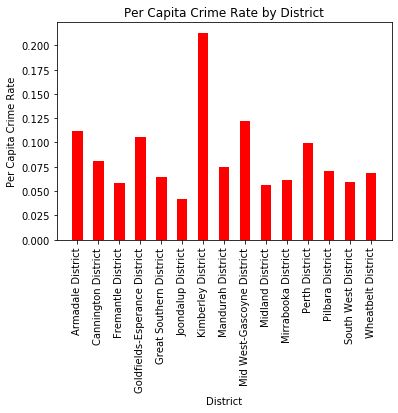

In [21]:
# PER CAPITA CRIME RATE BY DISTRICT
x = df['District'] 
y = df['Offence Rate (%)']
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='red',align= "center", width=.5)
plt.xlabel("District")
plt.ylabel("Per Capita Crime Rate")
plt.title("Per Capita Crime Rate by District")
plt.xticks(x_pos, x)
plt.xticks(rotation=90)

plt.savefig('Images/percapcrime_bar.png')
plt.show()

In [22]:
# MERGING WITH UNEMPLOYMENT DATA AND DROPPING UNWANTED COL
percap_merge = pd.merge(df, data_unemploy_update, how="left", on="District")
#percap_merge

In [23]:
del percap_merge['Total Employed']

In [24]:
del percap_merge['Total Persons_y']

In [25]:
del percap_merge['Unemployed']

In [26]:
percap_merge

,District,Total Persons_x,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%),Unemployment Rate (%)
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512,10.63
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741,10.17
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261,7.50
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398,7.05
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800,5.11
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0,0.041979,8.45
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0,0.213068,10.28
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0,0.074747,12.30
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0,0.122314,9.13
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0,0.056173,8.15


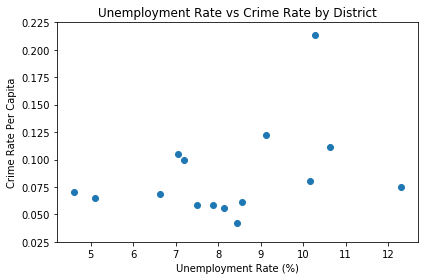

In [27]:
# UNEMPLOYMENT RATE VS CRIME RATE BY DISTRICT (ALREADY IN PER CAPITA)
unemploy_rate=percap_merge['Unemployment Rate (%)']
offence_rate=percap_merge['Offence Rate (%)']

plt.scatter(unemploy_rate,offence_rate)

plt.title('Unemployment Rate vs Crime Rate by District')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Rate Per Capita')
plt.ylim(0.025,0.225)
plt.savefig('Images/unemployrate_crimerate_scat.png')
plt.tight_layout()

plt.show()

In [28]:
linear_regression = st.linregress(unemploy_rate,offence_rate)
linear_regression

LinregressResult(slope=0.007136591270033273, intercept=0.02697087164070932, rvalue=0.35074476815695216, pvalue=0.19992267407800832, stderr=0.005284724143633523)

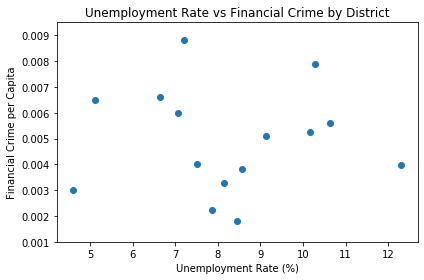

In [29]:
# UNEMPLOYMENT RATE VS FINANCIAL CRIME
unemploy_rate=percap_merge['Unemployment Rate (%)']
financial=percap_merge['FINANCIAL']/percap_merge['Total Persons_x']
plt.scatter(unemploy_rate,financial)

plt.title('Unemployment Rate vs Financial Crime by District')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Financial Crime per Capita')
plt.ylim(0.001,0.0095)
plt.tight_layout()
plt.show()

In [30]:
linear_regression = st.linregress(unemploy_rate,financial)
linear_regression

LinregressResult(slope=-8.801263788221082e-06, intercept=0.0049979956836044784, rvalue=-0.008999152480903622, pvalue=0.9746075134009472, stderr=0.00027124026792571434)

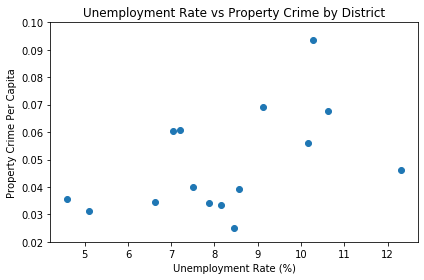

In [31]:
# UNEMPLOYMENT RATE VS PROPERTY CRIME
unemploy_rate=percap_merge['Unemployment Rate (%)']
property_val =percap_merge['PROPERTY']/percap_merge['Total Persons_x']
plt.scatter(unemploy_rate,property_val)

plt.title('Unemployment Rate vs Property Crime by District')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Property Crime Per Capita')
plt.savefig('Images/unemployrate_property_scat.png')
plt.ylim(0.02,0.10)
plt.tight_layout()
plt.show()

In [32]:
linear_regression = st.linregress(unemploy_rate,property_val)
linear_regression

LinregressResult(slope=0.004390308912551656, intercept=0.012280450933673338, rvalue=0.4809779198307576, pvalue=0.0695198515580966, stderr=0.0022195527562476483)

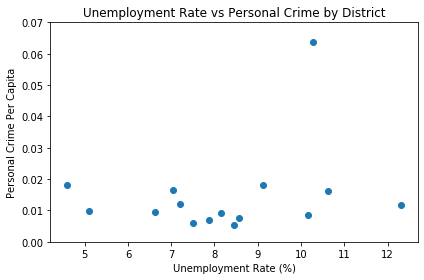

In [33]:
# UNEMPLOYMENT RATE VS PERSONAL CRIME
unemploy_rate=percap_merge['Unemployment Rate (%)']
personal=percap_merge['PERSONAL']/percap_merge['Total Persons_x']
plt.scatter(unemploy_rate,personal)

plt.title('Unemployment Rate vs Personal Crime by District')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Personal Crime Per Capita')
plt.ylim(0.00,0.07)
plt.tight_layout()
plt.show()

In [34]:
linear_regression = st.linregress(unemploy_rate,personal)
linear_regression

LinregressResult(slope=0.0016659631050153782, intercept=0.0008768880474201435, rvalue=0.2414295041826719, pvalue=0.38601808711008534, stderr=0.0018572157815924348)

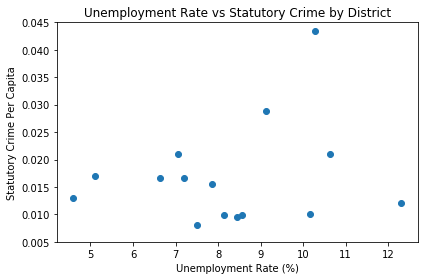

In [35]:
unemploy_rate=percap_merge['Unemployment Rate (%)']
stat=percap_merge['STATUTORY']/percap_merge['Total Persons_x']
plt.scatter(unemploy_rate,stat)

plt.title('Unemployment Rate vs Statutory Crime by District')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Statutory Crime Per Capita')
plt.ylim(0.005,0.045)
plt.tight_layout()
plt.show()

In [36]:
linear_regression = st.linregress(unemploy_rate,stat)
linear_regression

LinregressResult(slope=0.0009296408457616131, intercept=0.009168632044938979, rvalue=0.20783078134518967, pvalue=0.45731876084251943, stderr=0.00121351648054093)

The r-squared value is: 0.3663099193950824


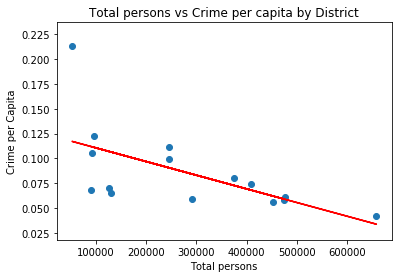

In [37]:
# NO. PEOPLE PER DISTRICT VS CRIME RATE
totalpersons=percap_merge['Total Persons_x']
totalcrime= percap_merge['Offence Rate (%)']
plt.scatter(totalpersons,totalcrime)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(totalpersons, totalcrime)
regress_vals = totalpersons * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(totalpersons,regress_vals,'r-')
plt.annotate(line_eq,(0,0),fontsize=15,color='red')
print(f'The r-squared value is: {rvalue**2}')

plt.title('Total persons vs Crime per capita by District')
plt.xlabel('Total persons')
plt.ylabel('Crime per Capita')
plt.savefig('Images/tperson_crimepcap_scat.png')
plt.show()

In [38]:
linear_regression = st.linregress(totalpersons,totalcrime)
linear_regression

LinregressResult(slope=-1.371256235353255e-07, intercept=0.12429622674686887, rvalue=-0.6052354247688104, pvalue=0.016814803812448945, stderr=5.002200026201402e-08)

The r-squared value is: 0.7173315855733237


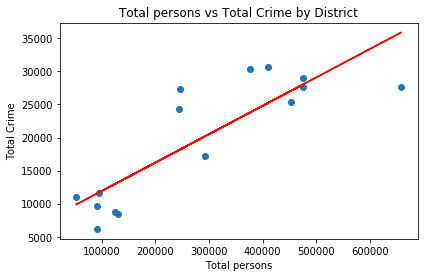

In [39]:
# NO. PEOPLE PER DISTRICT VS CRIME RATE
totalpersons=percap_merge['Total Persons_x']
totalcrimeamount= (percap_merge['FINANCIAL']+percap_merge['INCHOATE']+percap_merge['PERSONAL']+percap_merge['PROPERTY']+percap_merge['STATUTORY'])
plt.scatter(totalpersons,totalcrimeamount)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(totalpersons, totalcrimeamount)
regress_vals = totalpersons * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(totalpersons,regress_vals,'r-')
plt.annotate(line_eq,(20,38),fontsize=15,color='red')
print(f'The r-squared value is: {rvalue**2}')


plt.title('Total persons vs Total Crime by District')
plt.xlabel('Total persons')
plt.ylabel('Total Crime')
plt.savefig('Images/tperson_tcrime_scat.png')
plt.tight_layout()
plt.show()

In [40]:
linear_regression = st.linregress(totalpersons,totalcrimeamount)
linear_regression

LinregressResult(slope=0.04282869459960745, intercept=7651.285557710924, rvalue=0.8469542995778011, pvalue=6.780235756600049e-05, stderr=0.007456616811487915)

In [41]:
# DATA FILES
income_path = "Data/income_by_district_wa.csv"

# READ OFFENCE DATA
income_data = pd.read_csv(income_path)

In [42]:
income_data = income_data.replace({'Goldfields-Esperance Region':'Goldfields-Esperance District'})
income_data.head()

,District,Mean_Income
0,Armadale District,43496.46
1,Cannington District,46018.00
2,Fremantle District,51548.69
3,Goldfields-Esperance District,56274.51
4,Great Southern District,42729.14


In [43]:
percap_income = pd.merge(percap_merge, income_data, how="left", on="District")
percap_income.head()

,District,Total Persons_x,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%),Unemployment Rate (%),Mean_Income
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512,10.63,43496.46
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741,10.17,46018.00
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261,7.50,51548.69
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398,7.05,56274.51
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800,5.11,42729.14


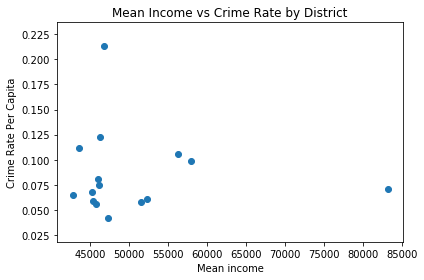

In [44]:
# CRIME RATE AGAINST INCOME
mean_income=percap_income['Mean_Income']
offence_rate=percap_income['Offence Rate (%)']
plt.scatter(mean_income,offence_rate)

plt.title('Mean Income vs Crime Rate by District')
plt.xlabel('Mean income')
plt.ylabel('Crime Rate Per Capita')
plt.tight_layout()
plt.show()

In [45]:
linear_regression = st.linregress(mean_income,offence_rate)
linear_regression

LinregressResult(slope=-3.007922405576945e-07, intercept=0.10095113846804135, rvalue=-0.07224822569204256, pvalue=0.7980477629117273, stderr=1.1516786915097546e-06)

In [46]:
# REMOVE PILBARA DUE TO HIGH INCOME TO CHECK IF ANY TRENDS ARE OBSERVED FROM OTHER DISTRICTS
not_pilbara=percap_income[percap_income['District'] !='Pilbara District']

In [47]:
not_pilbara

,District,Total Persons_x,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%),Unemployment Rate (%),Mean_Income
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512,10.63,43496.46
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741,10.17,46018.00
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261,7.50,51548.69
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398,7.05,56274.51
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800,5.11,42729.14
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0,0.041979,8.45,47235.26
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0,0.213068,10.28,46718.03
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0,0.074747,12.30,46070.86
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0,0.122314,9.13,46239.91
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0,0.056173,8.15,45752.76


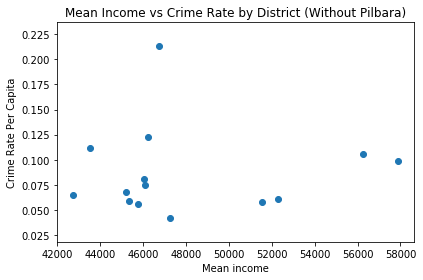

In [48]:
# CRIME RATE AGAINST INCOME - WITHOUT PILBARA
mean_income=not_pilbara['Mean_Income']
offence_rate=not_pilbara['Offence Rate (%)']
plt.scatter(mean_income,offence_rate)

plt.title('Mean Income vs Crime Rate by District (Without Pilbara)')
plt.xlabel('Mean income')
plt.ylabel('Crime Rate Per Capita')
plt.savefig('Images/avgincome_nopilb_crimerate_scat.png')
plt.tight_layout()
plt.show()

In [49]:
linear_regression = st.linregress(mean_income,offence_rate)
linear_regression

LinregressResult(slope=3.852543106418502e-07, intercept=0.06836784664801468, rvalue=0.04104898240962274, pvalue=0.8891905595638924, stderr=2.7070001656002102e-06)

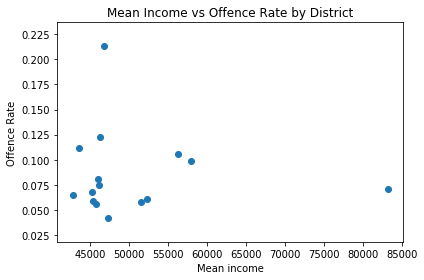

In [50]:
# MEAN INCOME AGAINST CRIME RATE
mean_income=percap_income['Mean_Income']
offence=percap_income['Offence Rate (%)']
plt.scatter(mean_income,offence)

plt.title('Mean Income vs Offence Rate by District')
plt.xlabel('Mean income')
plt.ylabel('Offence Rate')
plt.savefig('Images/avgincome_crimerate_scat.png')
plt.tight_layout()
plt.show()

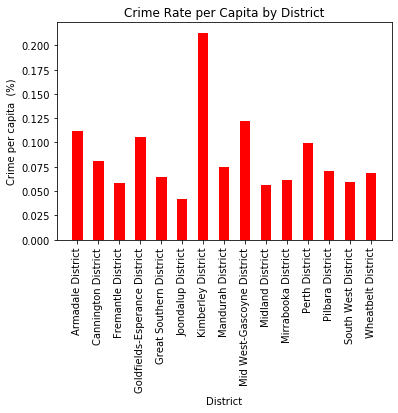

In [51]:
# CRIME RATE PER CAPITA BY DISTRICT
x = percap_income['District'] 
y = percap_income['Offence Rate (%)']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='red',align= "center", width=.5)
plt.xlabel("District")
plt.ylabel("Crime per capita  (%)")
plt.title("Crime Rate per Capita by District")
plt.xticks(x_pos, x)
plt.xticks(rotation=90)
plt.savefig('Images/percap_crimerate_bar.png')
plt.show()